In [1]:
# import all required dependencies
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime
import seaborn as sns
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Miral-PC\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# getting the Date
today = datetime.now().date()
start_date = datetime(today.year-5 ,today.month ,today.day).date()

In [3]:
#disconary of name of company and its ticker
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}

In [4]:
# Getting the stock data from yahoo finance and store into resource folder in .CSV format.
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    #globals()[ticker] = pdr.get_data_yahoo(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].index = globals()[ticker].index.date
    globals()[ticker].index.name='Date'
    globals()[ticker].to_csv(filepath)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Here we read all csv and store into different dataframe
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    globals()[ticker].index = pd.to_datetime(globals()[ticker].index)

In [6]:
# all ticker name list for labels graph comparision 
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)

In [7]:
# List of all stock companies
ticker_list = ["GOOGL","MSFT","TSLA","AMZN","NFLX","AAPL","META"]

In [8]:
# mearged dataframe which stores all data in single dataframe and store in to resource folder
Horizontal_mearged_df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker")
Horizontal_mearged_df = Horizontal_mearged_df.index.date

[*********************100%***********************]  7 of 7 completed


In [9]:
company_list= [Google,Microsoft,Tesla,Amazon,Netflix,Apple,Facebook] # which is df name and data is stored
company_name=["Google","Microsoft","Tesla","Amazon","Netflix","Apple","Facebook"] # which name we want to give them

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
Mearged_df = pd.concat(company_list, axis=0)
filepath= "Resources/Merged_df.csv"
Mearged_df.to_csv(filepath)
   

# 1.  What was the change in Closing price of the stock overtime?

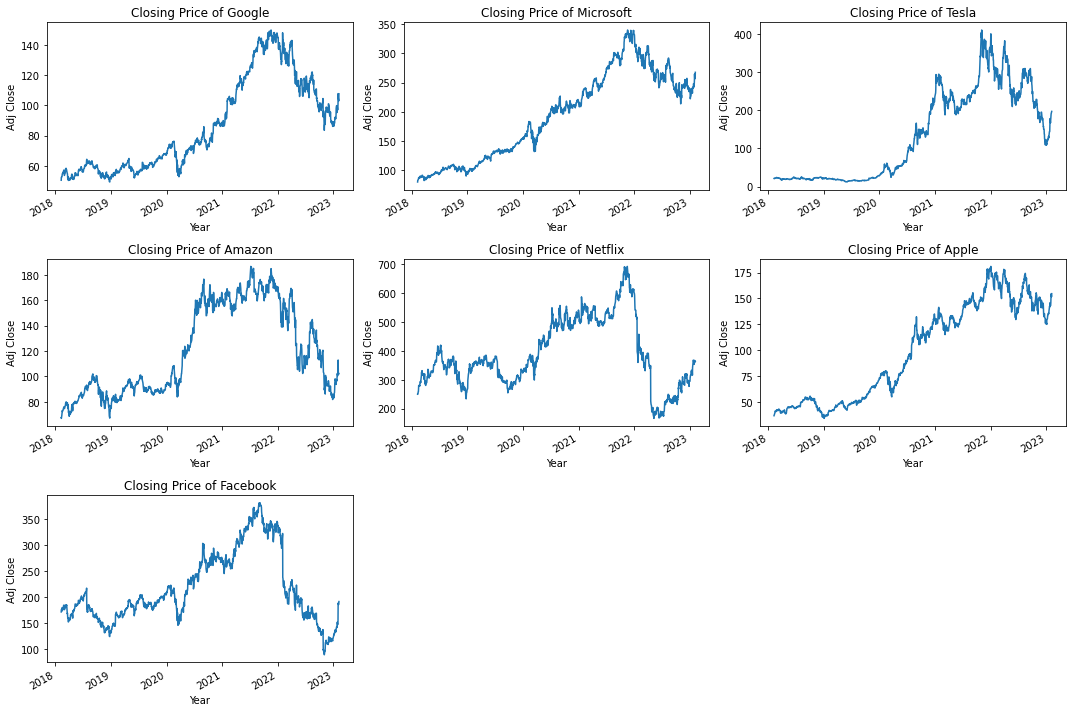

In [10]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel("Year")
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

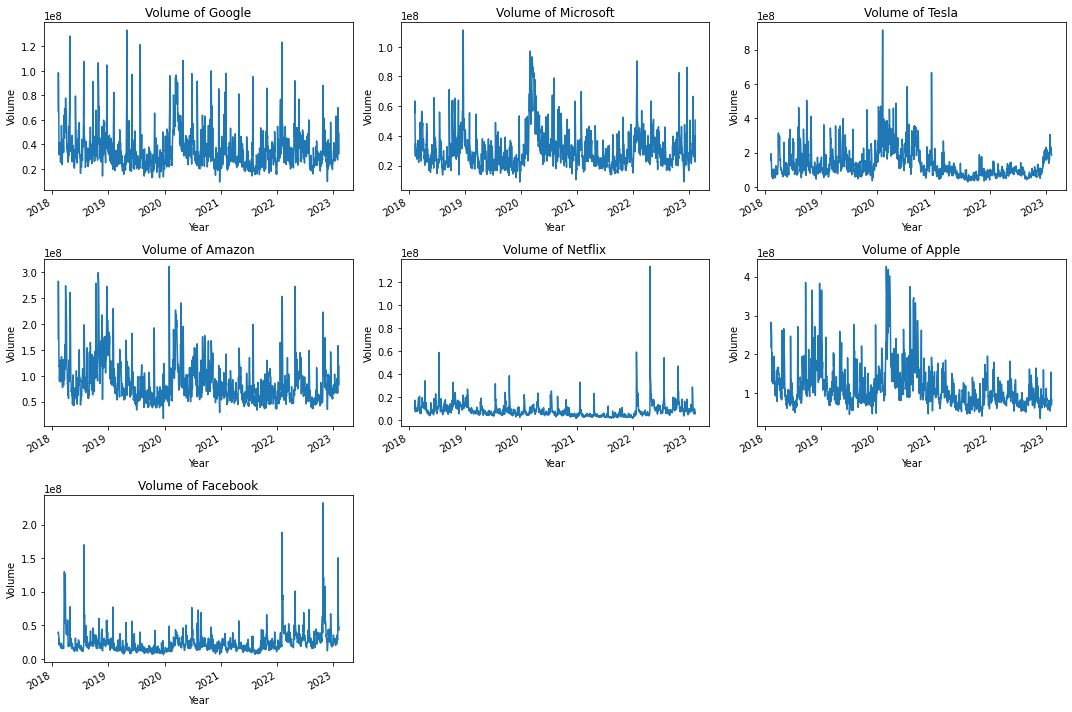

In [11]:
# Let's see a historical view of the volume of stock sell
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel("Year")
    plt.title(f"Volume of {company_name[i - 1]}")
    
plt.tight_layout()

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

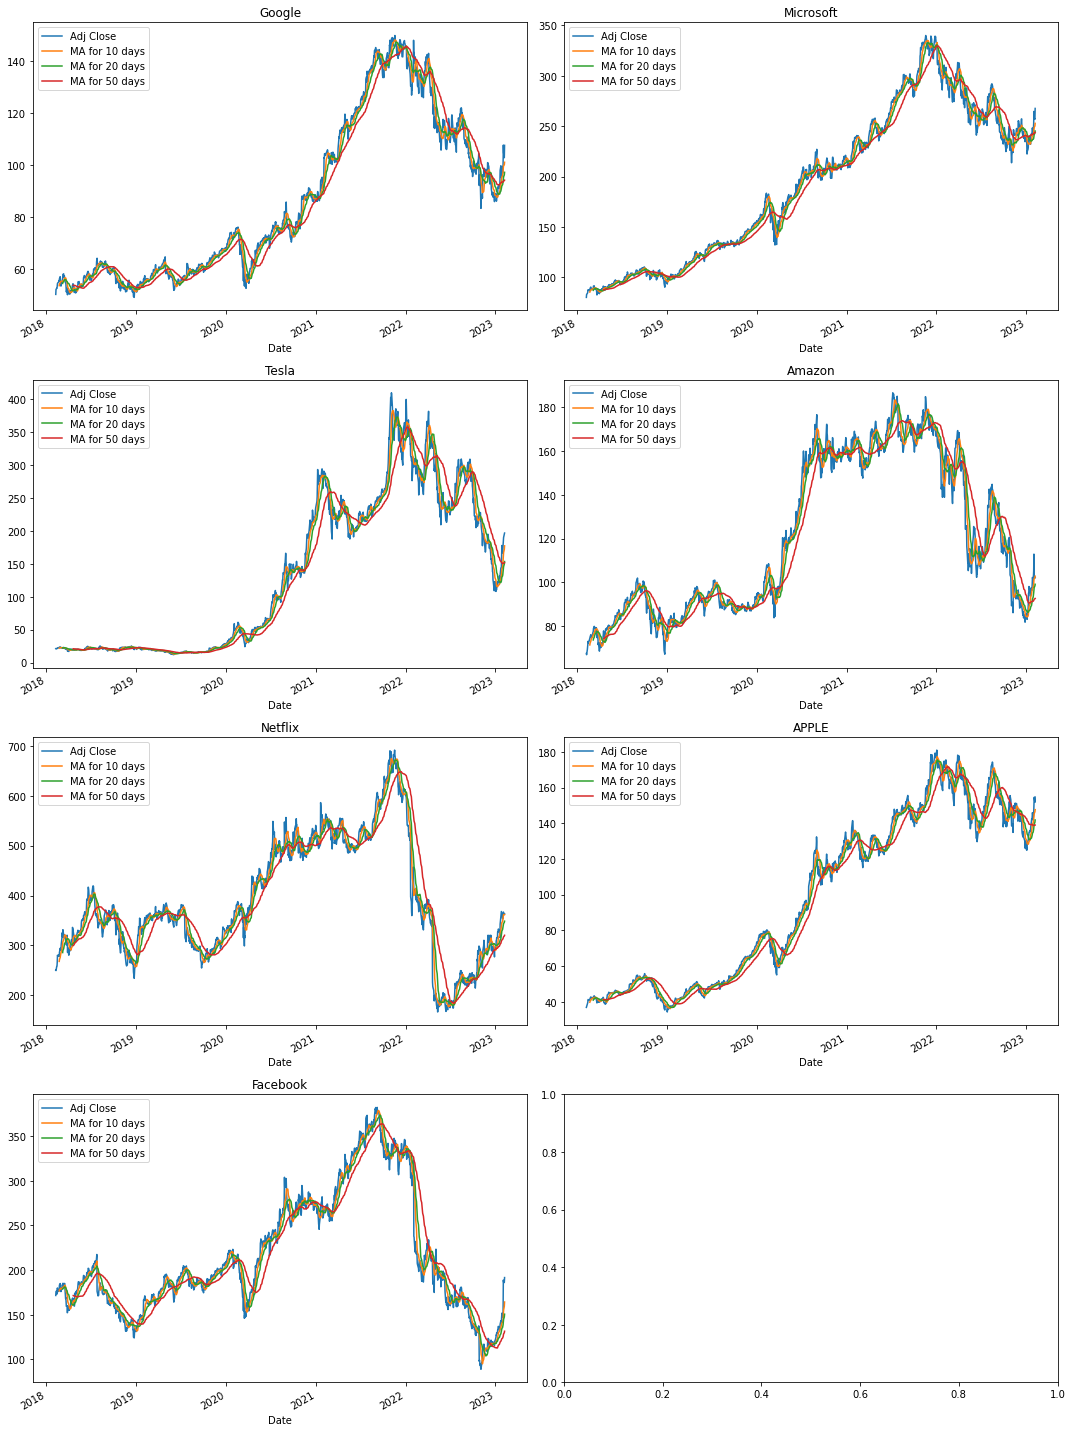

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)


Google[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Google')

Microsoft[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Microsoft')

Tesla[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Tesla')

Amazon[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Amazon')

Netflix[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Netflix')

Apple[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('APPLE')

Facebook[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Facebook')

plt.tight_layout()

# 3. What was the daily return of the stock on average?

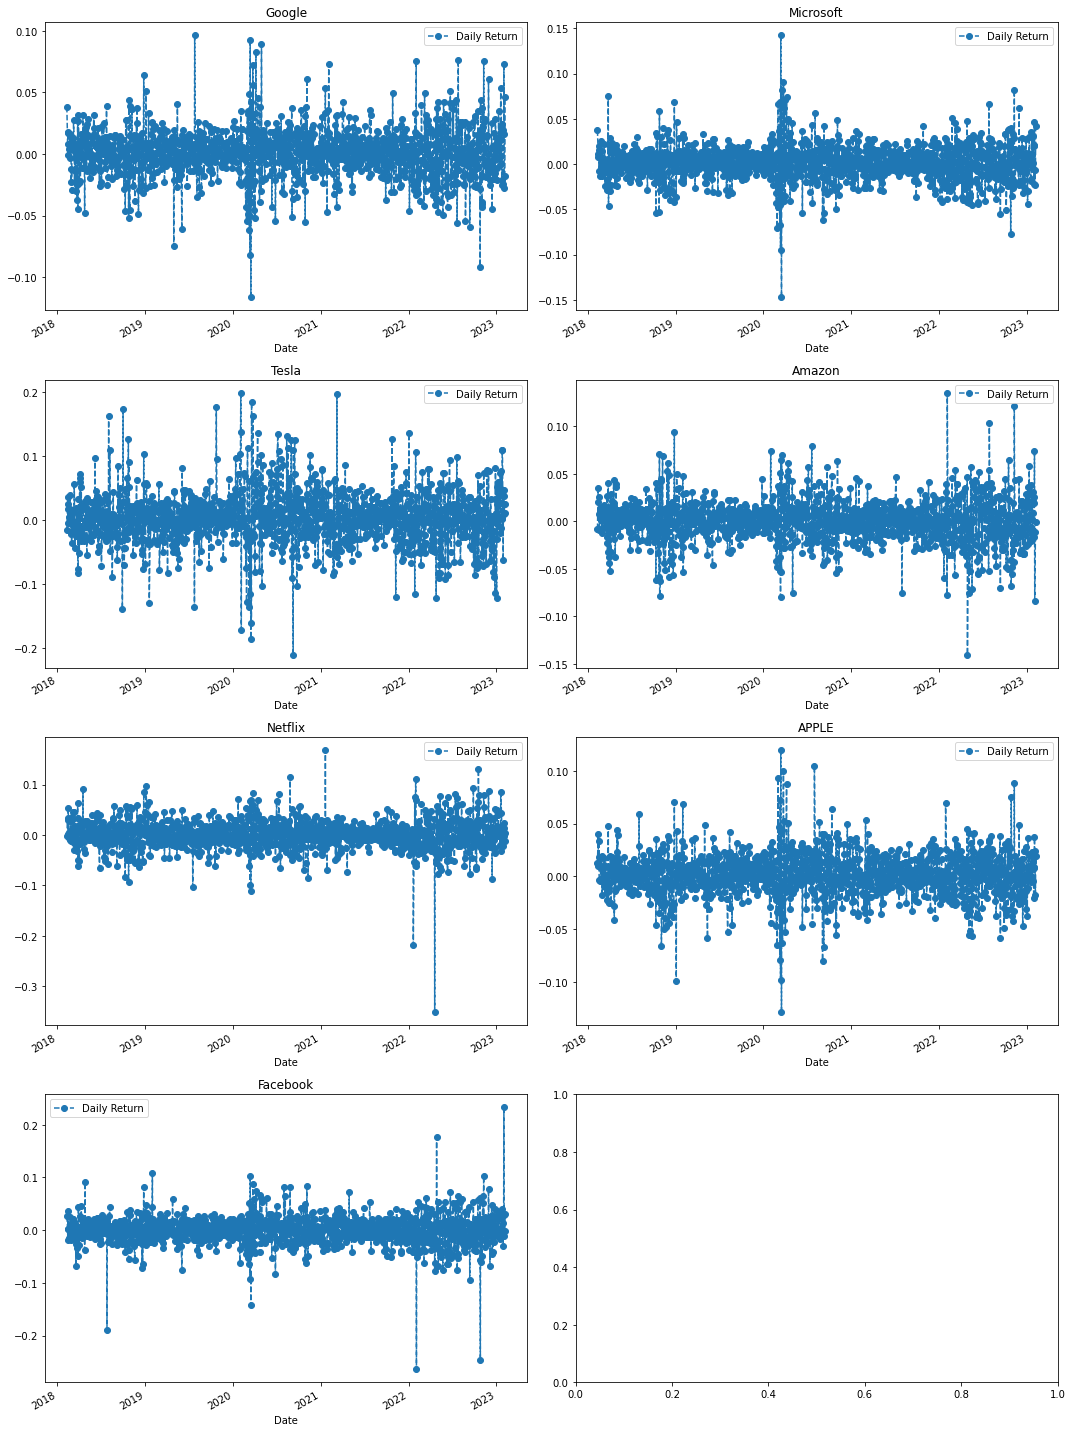

In [13]:
# use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return']= company['Adj Close'].pct_change()
    
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

Google['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Google')

Microsoft['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Microsoft')

Tesla['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Tesla')

Amazon['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Amazon')

Netflix['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Netflix')

Apple['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('APPLE')

Facebook['Daily Return'].plot(ax=axes[3,0], legend=True, linestyle='--', marker='o')
axes[3,0].set_title('Facebook')

plt.tight_layout()

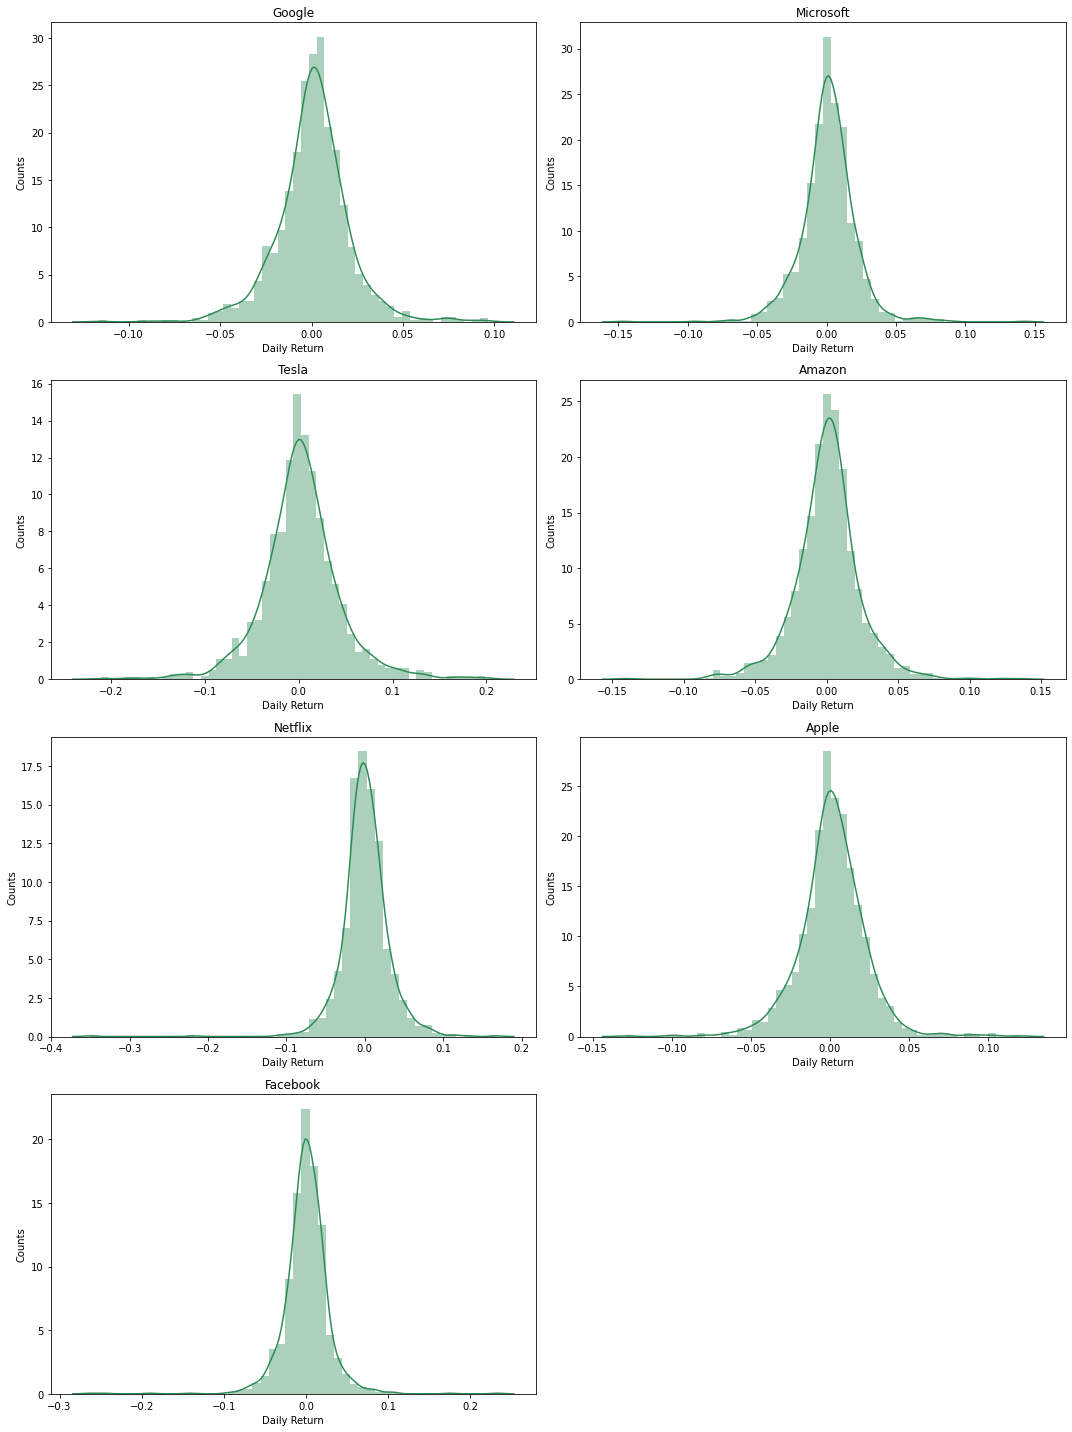

In [14]:
plt.figure(figsize=(15, 20))

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    #company['Daily Return'].hist(bins=50)
    sns.distplot(company['Daily Return'],bins=50,color="Seagreen")
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [15]:
Google

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2018-02-08,52.993500,53.196499,50.235001,50.385502,50.385502,66792000,Google,NaN,NaN,NaN,NaN
2018-02-09,51.293999,52.585999,49.849998,52.313499,52.313499,98360000,Google,NaN,NaN,NaN,0.038265
2018-02-12,52.833500,53.278500,52.274502,52.728001,52.728001,56240000,Google,NaN,NaN,NaN,0.007923
2018-02-13,52.500000,53.061001,52.346001,52.707001,52.707001,31586000,Google,NaN,NaN,NaN,-0.000398
2018-02-14,52.716000,53.773499,52.490002,53.634998,53.634998,41304000,Google,NaN,NaN,NaN,0.017607
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,98.709999,101.190002,97.580002,100.430000,100.430000,35531100,Google,97.688000,93.605999,93.5618,0.016087
2023-02-02,105.800003,107.849998,105.610001,107.739998,107.739998,69883800,Google,99.156999,94.588999,93.7680,0.072787
2023-02-03,102.930000,107.809998,102.580002,104.779999,104.779999,65283500,Google,99.832999,95.517999,93.9516,-0.027474


# 4. What was the correlation between different stocks closing prices?

In [23]:
# Adj closing price for all company
closing_df = yf.download(ticker_list,start= start_date,end =today)['Adj Close']
closing_df.index = closing_df.index.date
filepath= "Resources/Adj_closing.csv"
closing_df.to_csv(filepath)
closing_df

[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,GOOGL,META,MSFT,NFLX,TSLA
2018-02-08,36.883026,67.525002,50.385502,171.580002,80.055176,250.100006,21.015333
2018-02-09,37.334152,66.980003,52.313499,176.110001,83.040428,249.470001,20.694668
2018-02-12,38.837933,69.311501,52.728001,176.410004,83.935043,257.950012,21.048668
2018-02-13,39.227001,70.725502,52.707001,173.149994,84.594238,258.269989,21.577333
2018-02-14,39.950249,72.552498,53.634998,179.520004,85.918846,266.000000,21.487333
...,...,...,...,...,...,...,...
2023-02-01,145.429993,105.150002,100.430000,153.119995,252.750000,361.989990,181.410004
2023-02-02,150.820007,112.910004,107.739998,188.770004,264.600006,366.890015,188.270004
2023-02-03,154.500000,103.389999,104.779999,186.529999,258.350006,365.899994,189.979996
2023-02-06,151.729996,102.180000,102.900002,186.059998,256.769989,361.480011,194.759995


In [24]:
# finding all daily returns for all tech companies
daily_return_df = closing_df.pct_change()
daily_return_df = daily_return_df.dropna()
daily_return_df

,AAPL,AMZN,GOOGL,META,MSFT,NFLX,TSLA
2018-02-09,0.012231,-0.008071,0.038265,0.026402,0.037290,-0.002519,-0.015259
2018-02-12,0.040279,0.034809,0.007923,0.001703,0.010773,0.033992,0.017106
2018-02-13,0.010018,0.020401,-0.000398,-0.018480,0.007854,0.001240,0.025116
2018-02-14,0.018437,0.025832,0.017607,0.036789,0.015658,0.029930,-0.004171
2018-02-15,0.033578,0.007381,0.017395,0.002451,0.020372,0.053647,0.036487
...,...,...,...,...,...,...,...
2023-02-01,0.007901,0.019587,0.016087,0.027858,0.019935,0.022975,0.047281
2023-02-02,0.037063,0.073799,0.072787,0.232824,0.046884,0.013536,0.037815
2023-02-03,0.024400,-0.084315,-0.027474,-0.011866,-0.023621,-0.002698,0.009083
2023-02-06,-0.017929,-0.011703,-0.017942,-0.002520,-0.006116,-0.012080,0.025161


# scipy.stats.pearsonr(x, y)

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

(1.0, 0.0)


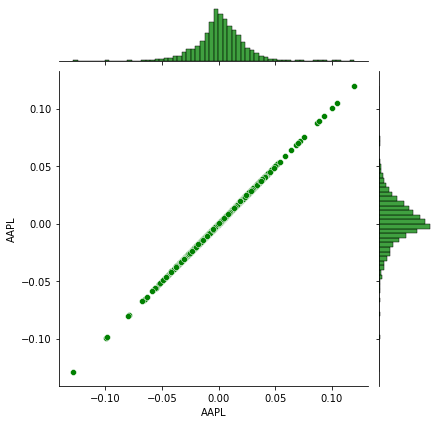

In [18]:
# Comparing Apple to itself should show a perfectly linear relationship
from scipy import stats
res = stats.pearsonr(x=daily_return_df['AAPL'], y=daily_return_df['AAPL'])
sns.jointplot(x=daily_return_df['AAPL'], y=daily_return_df['AAPL'], kind='scatter', color='green')
print(res)

In [19]:
# Comparing Apple to Facebool should show a perfectly linear relationship
# url: https://en.wikipedia.org/wiki/Pearson_correlation_coefficientsns.jointplot(x=daily_return_df['AAPL'], y=daily_return_df['META'], kind='scatter', color='green')
res = stats.pearsonr(x=daily_return_df['AAPL'], y=daily_return_df['META'])
print(res)

(0.5768757479763891, 2.0763139445455943e-112)


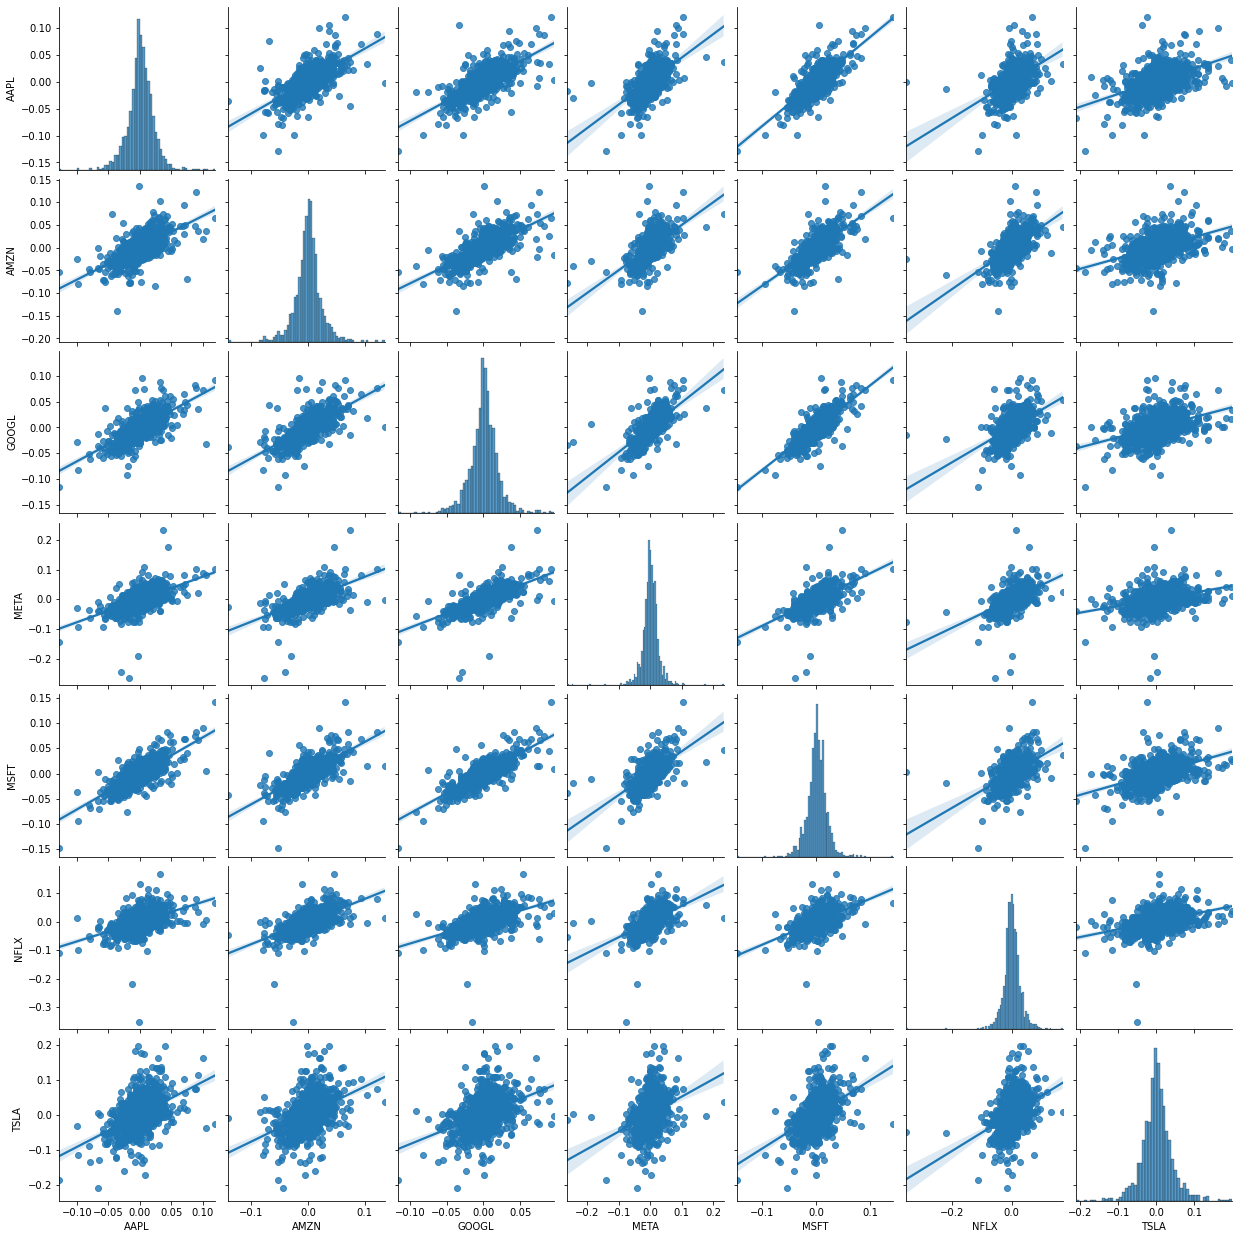

In [20]:
sns.pairplot(daily_return_df, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

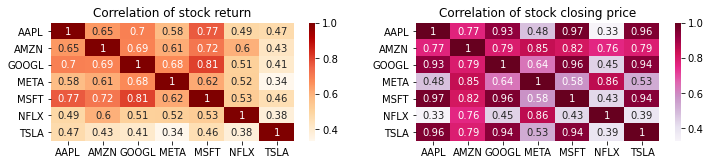

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
sns.heatmap(daily_return_df.corr(), annot=True, cmap='OrRd')
plt.title('Correlation of stock return')

plt.subplot(4, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='PuRd')
plt.title('Correlation of stock closing price')

# 5. How much value do we put at risk by investing in a particular stock?

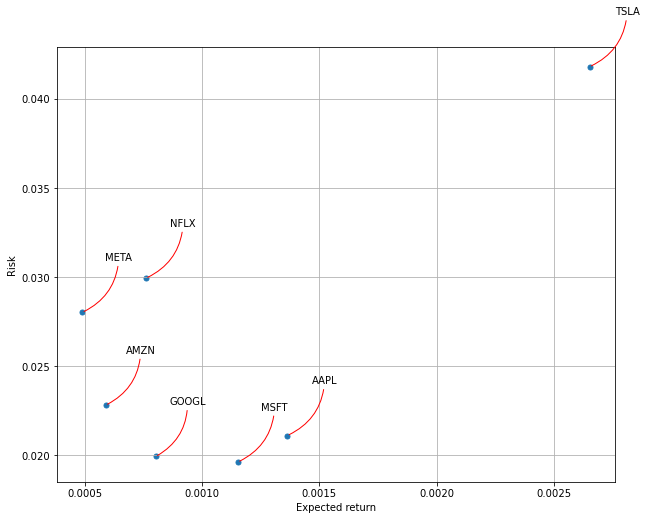

In [22]:
daily_return_df1 = daily_return_df.dropna()

plt.figure(figsize=(10, 8))
plt.scatter(daily_return_df1.mean(), daily_return_df1.std(), s=25)
plt.grid(True)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(daily_return_df1.columns, daily_return_df1.mean(), daily_return_df1.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))